In [6]:
import numpy as np
import pandas as pd
import keras
import tensorflow


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

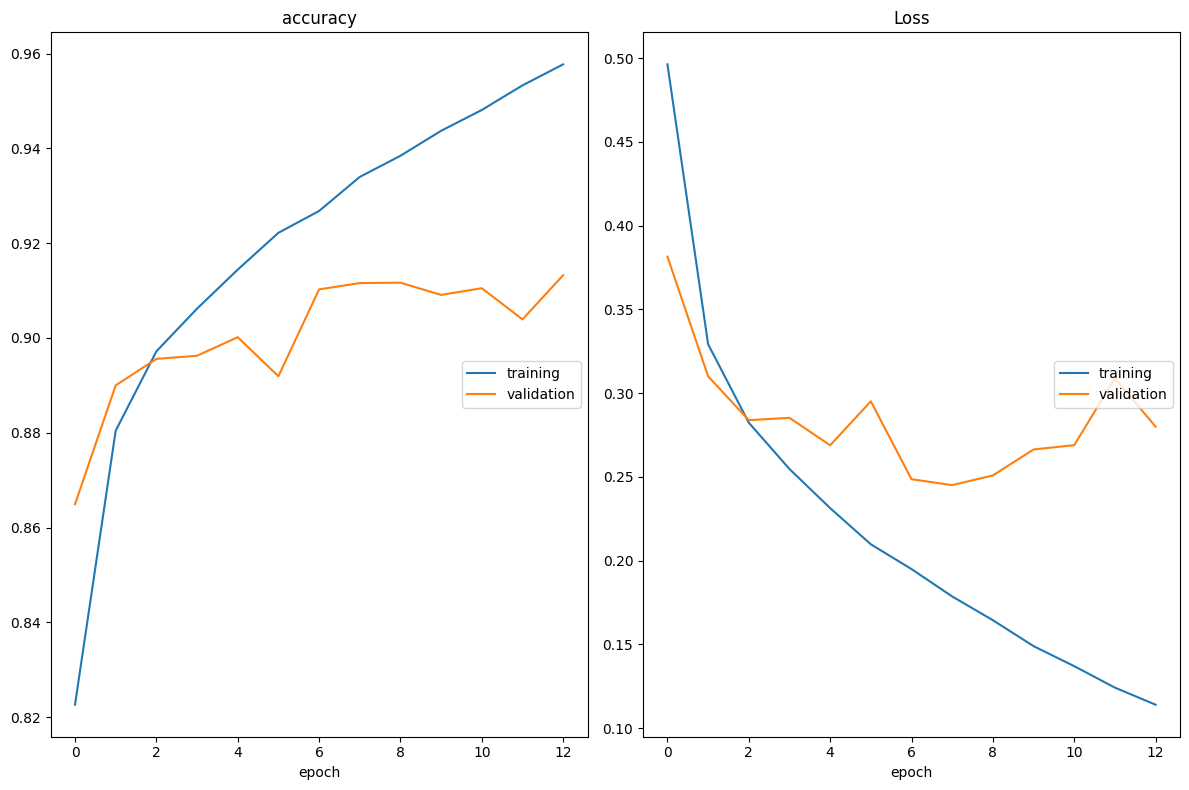

accuracy
	training         	 (min:    0.823, max:    0.958, cur:    0.958)
	validation       	 (min:    0.865, max:    0.913, cur:    0.913)
Loss
	training         	 (min:    0.114, max:    0.496, cur:    0.114)
	validation       	 (min:    0.245, max:    0.381, cur:    0.280)
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9597 - loss: 0.1098 - val_accuracy: 0.9133 - val_loss: 0.2799
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9106 - loss: 0.3135
Final Test Accuracy: 0.9116 
Final Test Loss: 0.2980


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from livelossplot import PlotLossesKeras

model = Sequential()


model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=0,
        mode='auto'
    ),
    PlotLossesKeras()
]
model.fit(x_train, y_train, epochs=100, 
          validation_split = 0.2,
          callbacks=[PlotLossesKeras(),callbacks])


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}",f"\nFinal Test Loss: {loss:.4f}")

With our first model we reach a final test accuracy of 91.2%. To attempt to improve this we will add some dropout to reduct overfitting.

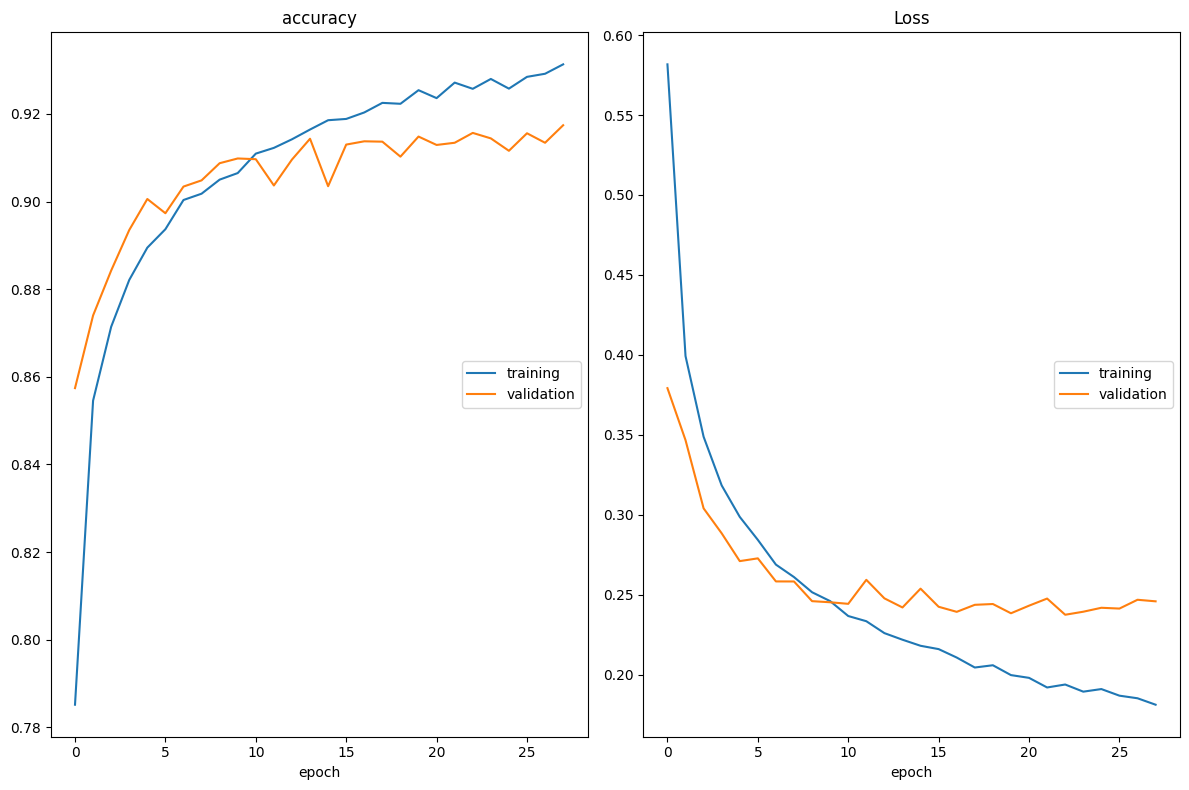

accuracy
	training         	 (min:    0.785, max:    0.931, cur:    0.931)
	validation       	 (min:    0.857, max:    0.917, cur:    0.917)
Loss
	training         	 (min:    0.181, max:    0.582, cur:    0.181)
	validation       	 (min:    0.237, max:    0.379, cur:    0.246)
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9329 - loss: 0.1771 - val_accuracy: 0.9174 - val_loss: 0.2458
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9144 - loss: 0.2652
Final Test Accuracy: 0.9135 
Final Test Loss: 0.2648


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from livelossplot import PlotLossesKeras

dropout_rate = 0.2


model = Sequential()


model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=10, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=0,
        mode='auto'
    ),
    PlotLossesKeras()
]
model.fit(x_train, y_train, epochs=100, 
          validation_split = 0.2,
          callbacks=[PlotLossesKeras(),callbacks])


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}",f"\nFinal Test Loss: {loss:.4f}")

Accuracy did not really improve by much, so now I will try to increase the complexity of the model slightly to see if we can capture more.

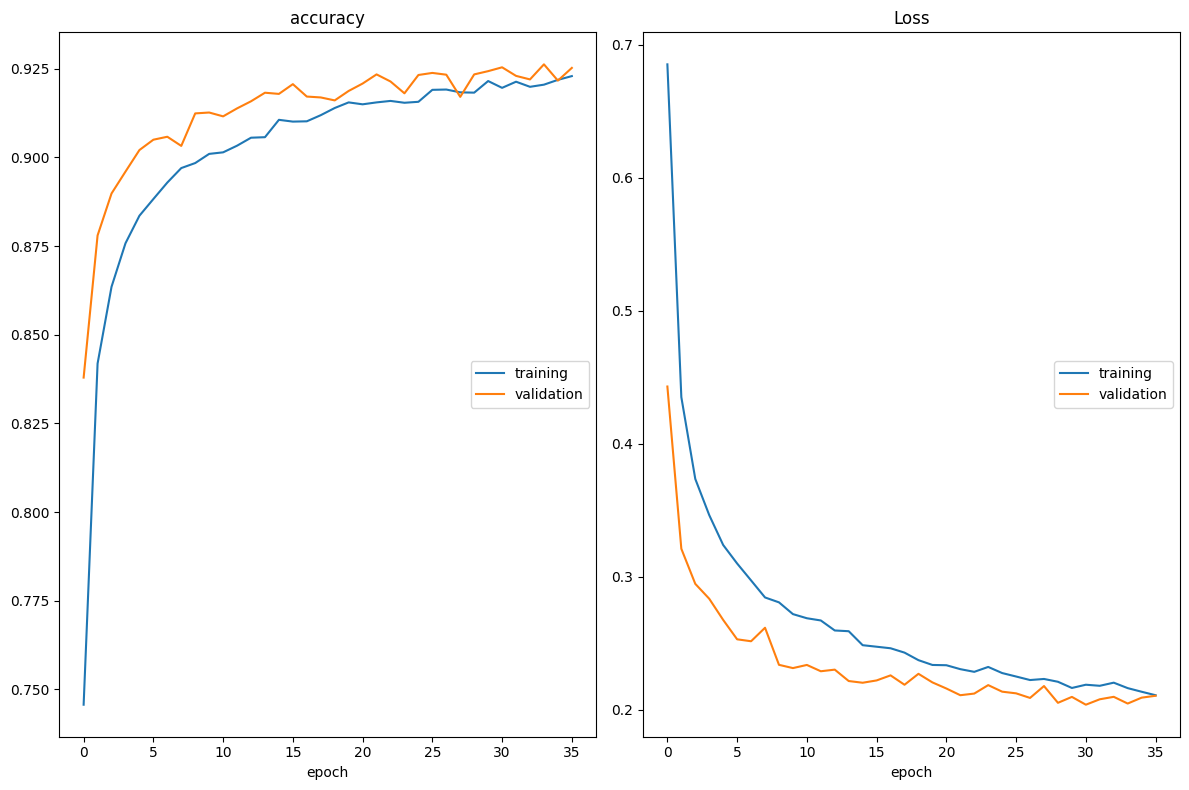

accuracy
	training         	 (min:    0.746, max:    0.923, cur:    0.923)
	validation       	 (min:    0.838, max:    0.926, cur:    0.925)
Loss
	training         	 (min:    0.211, max:    0.685, cur:    0.211)
	validation       	 (min:    0.204, max:    0.443, cur:    0.211)
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9224 - loss: 0.2101 - val_accuracy: 0.9252 - val_loss: 0.2106
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9247 - loss: 0.2289
Final Test Accuracy: 0.9233 
Final Test Loss: 0.2231


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from livelossplot import PlotLossesKeras

dropout_rate = 0.3


model = Sequential()


model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=10, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=0,
        mode='auto'
    ),
    PlotLossesKeras()
]
model.fit(x_train, y_train, epochs=100, 
          validation_split = 0.2,
          callbacks=[PlotLossesKeras(),callbacks])


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}",f"\nFinal Test Loss: {loss:.4f}")

Looks like we were able to gain a little bit more accuracy up to 92.3% with those changes.